# Salary Exploratory Data Analysis (EDA)

## Overview

This project is an Exploratory Data Analysis (EDA) of lists of salaries with additional information such as age, gender, years of experience, salary, and much more. You can get dataset on this [link](https://www.kaggle.com/datasets/sudheerp2147234/salary-dataset-based-on-country-and-race)

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv('Salary_Data_Based_country_and_race.csv')

## Data Cleansing

In [90]:
df

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


### Removing unnecessary column

In [91]:
df.drop(columns=['Unnamed: 0','Race'],axis=1,inplace=True)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA
4,52.0,Male,Master's,Director,20.0,200000.0,USA
...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China


### Dropping 'other' value in 'Gender column

In [92]:
df = df.drop(df[df['Gender'] == 'Other'].index,axis=0)

### Fixing value for 'Education Level'

In [103]:
df.dropna(inplace=True)
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School'], dtype=object)

In [94]:
df['Education Level'] = df['Education Level'].apply(lambda x: 'PhD' if x.lower() == 'phd' else x)

## Exploratory Data Analysis

In [95]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA
4,52.0,Male,Master's,Director,20.0,200000.0,USA
...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China


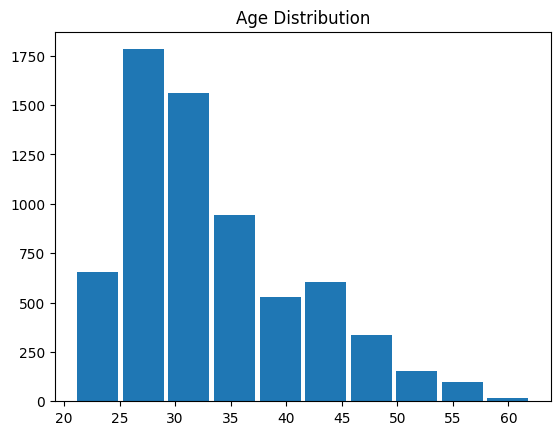

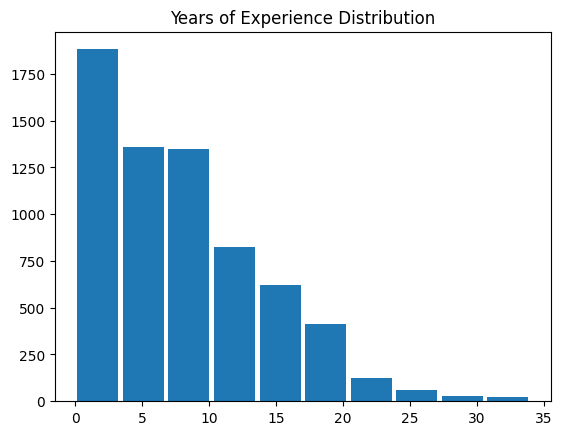

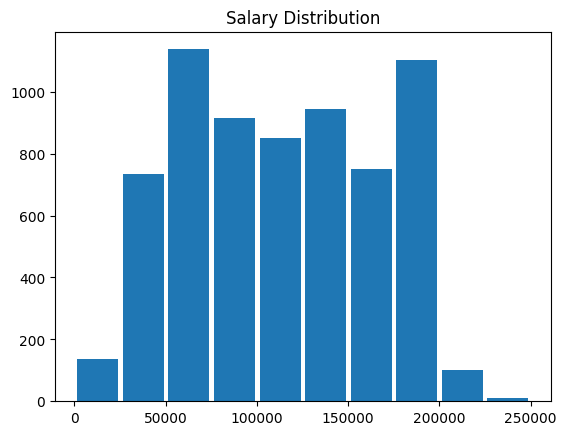

In [96]:
numeric_df = df[['Age','Years of Experience','Salary']]
for i in numeric_df.columns:
    plt.hist(df[i],rwidth=0.9)
    plt.title(label=str(i + ' Distribution'))
    plt.show()

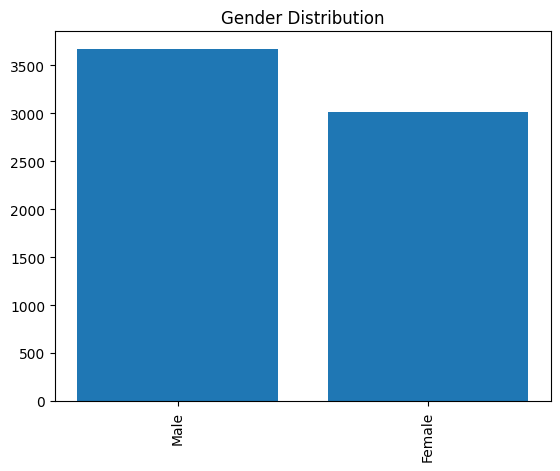

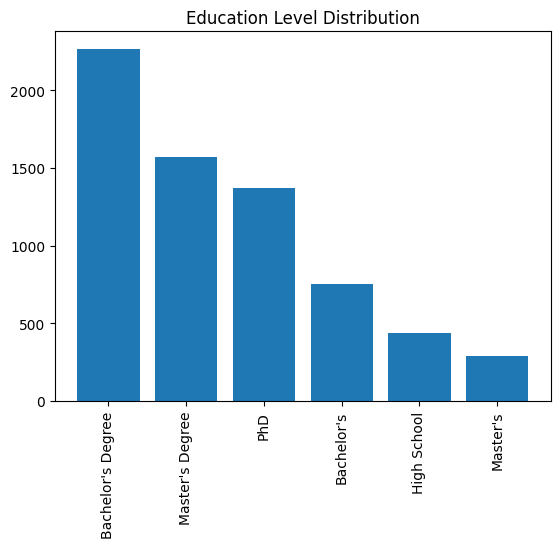

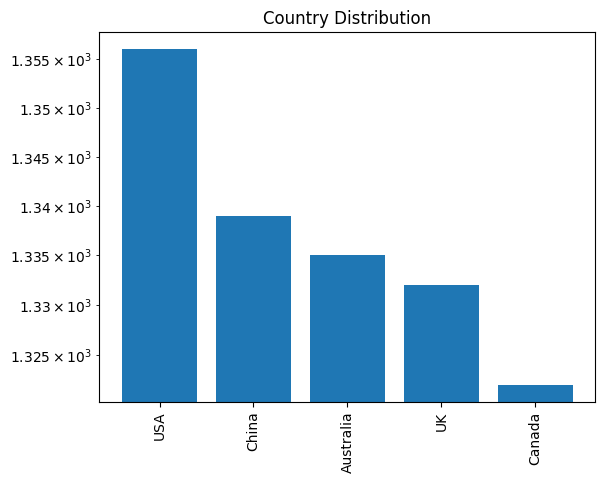

In [97]:
categorical_df = df[['Gender','Education Level','Country']]
for i in categorical_df.columns:
    counts = df[i].value_counts()
    plt.bar(x=counts.index, height=counts.values)
    if i == 'Country':
        plt.yscale('log')
    plt.title(label=str(i + ' Distribution'))
    plt.xticks(rotation=90)
    plt.show()

Text(0.5, 1.0, 'Correlation coef. between each numerical variable')

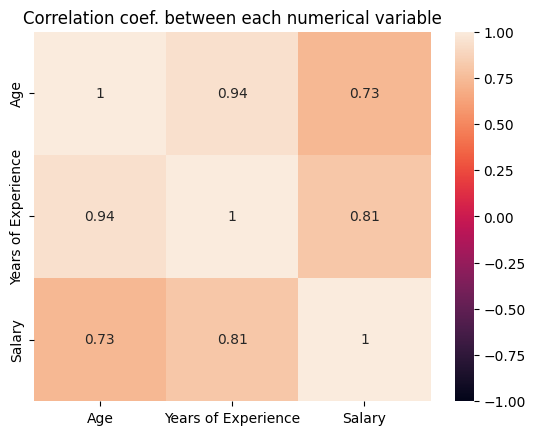

In [98]:
sns.heatmap(numeric_df.corr(),vmin=-1,vmax=1,annot=True)
plt.title(label='Correlation coef. between each numerical variable')

Text(3, 50, 'r = 0.73')

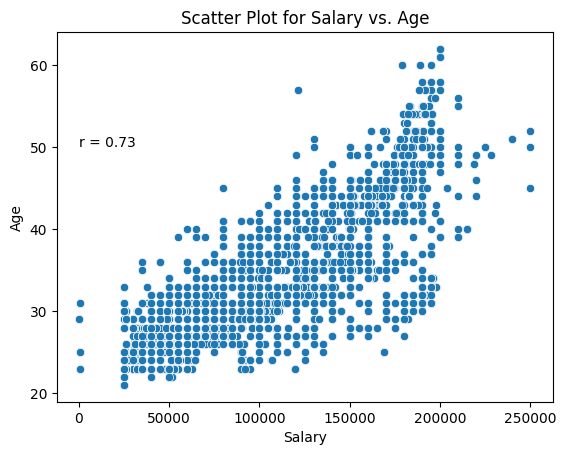

In [99]:
sns.scatterplot(x=df.Salary,y=df.Age)
plt.title(label='Scatter Plot for Salary vs. Age')
plt.text(3,50,'r = 0.73')

In [101]:
pd.pivot_table(df,index=['Gender','Country'],values='Salary')

Salary
Gender Country                 
Female Australia  107913.565147
       Canada     106884.711340
       China      111291.211506
       UK         108456.692939
       USA        104992.690438
Male   Australia  120896.764216
       Canada     123982.064865
       China      120226.312834
       UK         122206.366528
       USA        119683.120433

The highest salary on average for female is in China, and the highest salary on average for male is in Canada

In [102]:
pd.pivot_table(data=df,index='Education Level',values='Years of Experience')

,Years of Experience
Education Level,
Bachelor's,5.550926
Bachelor's Degree,5.375717
High School,1.504587
Master's,9.489583
Master's Degree,9.668790
PhD,13.915267


PhD's education level has the highest years of experience on average than the other education level

In [105]:
pd.pivot_table(data=df,index='Job Title',values='Age').sort_values('Age')

,Age
Job Title,
Receptionist,23.649123
Junior Developer,24.000000
Delivery Driver,24.000000
Juniour HR Coordinator,24.333333
Help Desk Analyst,25.000000
...,...
Supply Chain Analyst,50.000000
Director of Sales and Marketing,50.000000
Director of Human Resources,51.000000


Receptionist has the youngest age on average and Director has the oldest age on average